In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ELC2022 = pd.read_csv(r"C:\Users\anton_zpf58tt\OneDrive\Documents\Glasgow\Year 4\ENG4110P Individual Project 4\Code\UK-Electricity-Pricing-Solutions\Flows_ELECLINK_20220101-20221231.csv")

ELC2022 = ELC2022.replace('n/e', np.NaN)
ELC2022 = ELC2022.replace('N/A', np.NaN)

ELC2022 = {'Time (CET/CEST)': ELC2022.iloc[:,0],'BZN|FR > BZN|GB [MW]': ELC2022.iloc[:,1],'BZN|GB > BZN|FR [MW]': ELC2022.iloc[:,2]}

ELC2022['BZN|FR > BZN|GB [MW]'] = pd.to_numeric(ELC2022['BZN|FR > BZN|GB [MW]'], errors='coerce')
ELC2022['BZN|GB > BZN|FR [MW]'] = pd.to_numeric(ELC2022['BZN|GB > BZN|FR [MW]'], errors='coerce')

ELC2022 = pd.DataFrame(ELC2022)

ELC2022.loc[1656:, 'BZN|FR > BZN|GB [MW]'] = ELC2022.loc[1656:, 'BZN|FR > BZN|GB [MW]'].interpolate().values.ravel().tolist()
ELC2022.loc[1656:, 'BZN|GB > BZN|FR [MW]'] = ELC2022.loc[1656:, 'BZN|GB > BZN|FR [MW]'].interpolate().values.ravel().tolist()

print(ELC2022.to_string())

B = ELC2022.iloc[8760,1]/2
B

                          Time (CET/CEST)  BZN|FR > BZN|GB [MW]  BZN|GB > BZN|FR [MW]
0     01.01.2022 00:00 - 01.01.2022 01:00                   NaN                   NaN
1     01.01.2022 01:00 - 01.01.2022 02:00                   NaN                   NaN
2     01.01.2022 02:00 - 01.01.2022 03:00                   NaN                   NaN
3     01.01.2022 03:00 - 01.01.2022 04:00                   NaN                   NaN
4     01.01.2022 04:00 - 01.01.2022 05:00                   NaN                   NaN
5     01.01.2022 05:00 - 01.01.2022 06:00                   NaN                   NaN
6     01.01.2022 06:00 - 01.01.2022 07:00                   NaN                   NaN
7     01.01.2022 07:00 - 01.01.2022 08:00                   NaN                   NaN
8     01.01.2022 08:00 - 01.01.2022 09:00                   NaN                   NaN
9     01.01.2022 09:00 - 01.01.2022 10:00                   NaN                   NaN
10    01.01.2022 10:00 - 01.01.2022 11:00             

512.5

In [7]:
# Python code to find average of each consecutive segment
  
# Importing
import statistics
from itertools import islice
import numpy as np

def function():
    result = []
    for i in range(0, len(ELC2022.iloc[:,0])):
        if i < 85:
            number = i
            start = 24*i
            end = 24*(i+1)-1+1
            day = ELC2022.iloc[start,0]
            operation1 = sum(ELC2022.iloc[start:end,1])
            operation2 = sum(ELC2022.iloc[start:end,2])
            result.append({"Day": day, "BZN|FR > BZN|GB [MW]": operation1, "BZN|GB > BZN|FR [MW]": operation2})
        elif i == 85:
            number = i
            start = 24*i
            skip = 2042
            end = 2063+1
            day = ELC2022.iloc[start,0]
            operation1 = sum(ELC2022.iloc[start:skip,1]) + sum(ELC2022.iloc[(skip+1):end,1])
            operation2 = sum(ELC2022.iloc[start:skip,2]) + sum(ELC2022.iloc[(skip+1):end,2])
            result.append({"Day": day, "BZN|FR > BZN|GB [MW]": operation1, "BZN|GB > BZN|FR [MW]": operation2})
        elif 86 <= i < 302:
            number = i
            start = 24*i
            end = 24*(i+1)-1+1
            day = ELC2022.iloc[start,0]
            operation1 = sum(ELC2022.iloc[start:end,1])
            operation2 = sum(ELC2022.iloc[start:end,2])
            result.append({"Day": day, "BZN|FR > BZN|GB [MW]": operation1, "BZN|GB > BZN|FR [MW]": operation2})
        elif i == 302:
            number = i
            start = 24*i
            end = 7272+1
            day = ELC2022.iloc[start,0]
            operation1 = sum(ELC2022.iloc[start:end,1])
            operation2 = sum(ELC2022.iloc[start:end,2])
            result.append({"Day": day, "BZN|FR > BZN|GB [MW]": operation1, "BZN|GB > BZN|FR [MW]": operation2})
        elif 303 <= i < 365:
            number = i
            start = 24*i+1
            end = 24*(i+1)-1+2
            day = ELC2022.iloc[start,0]
            operation1 = sum(ELC2022.iloc[start:end,1])
            operation2 = sum(ELC2022.iloc[start:end,2])
            result.append({"Day": day, "BZN|FR > BZN|GB [MW]": operation1, "BZN|GB > BZN|FR [MW]": operation2})
    df = pd.DataFrame(result, columns=['Day','BZN|FR > BZN|GB [MW]', 'BZN|GB > BZN|FR [MW]'])
    return df
print(function())

                                     Day  BZN|FR > BZN|GB [MW]  \
0    01.01.2022 00:00 - 01.01.2022 01:00                   NaN   
1    02.01.2022 00:00 - 02.01.2022 01:00                   NaN   
2    03.01.2022 00:00 - 03.01.2022 01:00                   NaN   
3    04.01.2022 00:00 - 04.01.2022 01:00                   NaN   
4    05.01.2022 00:00 - 05.01.2022 01:00                   NaN   
..                                   ...                   ...   
360  27.12.2022 00:00 - 27.12.2022 01:00               22886.0   
361  28.12.2022 00:00 - 28.12.2022 01:00               18879.0   
362  29.12.2022 00:00 - 29.12.2022 01:00               15208.0   
363  30.12.2022 00:00 - 30.12.2022 01:00               15066.0   
364  31.12.2022 00:00 - 31.12.2022 01:00               24519.0   

     BZN|GB > BZN|FR [MW]  
0                     NaN  
1                     NaN  
2                     NaN  
3                     NaN  
4                     NaN  
..                    ...  
360        

In [8]:
ELC2022 = function()
print(ELC2022.to_string())

ELC2022

                                     Day  BZN|FR > BZN|GB [MW]  BZN|GB > BZN|FR [MW]
0    01.01.2022 00:00 - 01.01.2022 01:00                   NaN                   NaN
1    02.01.2022 00:00 - 02.01.2022 01:00                   NaN                   NaN
2    03.01.2022 00:00 - 03.01.2022 01:00                   NaN                   NaN
3    04.01.2022 00:00 - 04.01.2022 01:00                   NaN                   NaN
4    05.01.2022 00:00 - 05.01.2022 01:00                   NaN                   NaN
5    06.01.2022 00:00 - 06.01.2022 01:00                   NaN                   NaN
6    07.01.2022 00:00 - 07.01.2022 01:00                   NaN                   NaN
7    08.01.2022 00:00 - 08.01.2022 01:00                   NaN                   NaN
8    09.01.2022 00:00 - 09.01.2022 01:00                   NaN                   NaN
9    10.01.2022 00:00 - 10.01.2022 01:00                   NaN                   NaN
10   11.01.2022 00:00 - 11.01.2022 01:00                   NaN   

Day  BZN|FR > BZN|GB [MW]  \
0    01.01.2022 00:00 - 01.01.2022 01:00                   NaN   
1    02.01.2022 00:00 - 02.01.2022 01:00                   NaN   
2    03.01.2022 00:00 - 03.01.2022 01:00                   NaN   
3    04.01.2022 00:00 - 04.01.2022 01:00                   NaN   
4    05.01.2022 00:00 - 05.01.2022 01:00                   NaN   
..                                   ...                   ...   
360  27.12.2022 00:00 - 27.12.2022 01:00               22886.0   
361  28.12.2022 00:00 - 28.12.2022 01:00               18879.0   
362  29.12.2022 00:00 - 29.12.2022 01:00               15208.0   
363  30.12.2022 00:00 - 30.12.2022 01:00               15066.0   
364  31.12.2022 00:00 - 31.12.2022 01:00               24519.0   

     BZN|GB > BZN|FR [MW]  
0                     NaN  
1                     NaN  
2                     NaN  
3                     NaN  
4                     NaN  
..                    ...  
360                   0.0  
361                   0.0  
362                   0.0  
363                 715.0  
364                   0.0  

[365 rows x 3 columns]

In [9]:
ELCFlows = ELC2022

ELCFlows["Date"] = pd.date_range(start="1/1/2022", periods=365, freq="D")

NewOrder = ["Date", "BZN|FR > BZN|GB [MW]", "BZN|GB > BZN|FR [MW]"]

ELCFlows = ELCFlows.reindex(columns=NewOrder)

ELCFlows

Date  BZN|FR > BZN|GB [MW]  BZN|GB > BZN|FR [MW]
0   2022-01-01                   NaN                   NaN
1   2022-01-02                   NaN                   NaN
2   2022-01-03                   NaN                   NaN
3   2022-01-04                   NaN                   NaN
4   2022-01-05                   NaN                   NaN
..         ...                   ...                   ...
360 2022-12-27               22886.0                   0.0
361 2022-12-28               18879.0                   0.0
362 2022-12-29               15208.0                   0.0
363 2022-12-30               15066.0                 715.0
364 2022-12-31               24519.0                   0.0

[365 rows x 3 columns]

(19047.25, 19371.75)


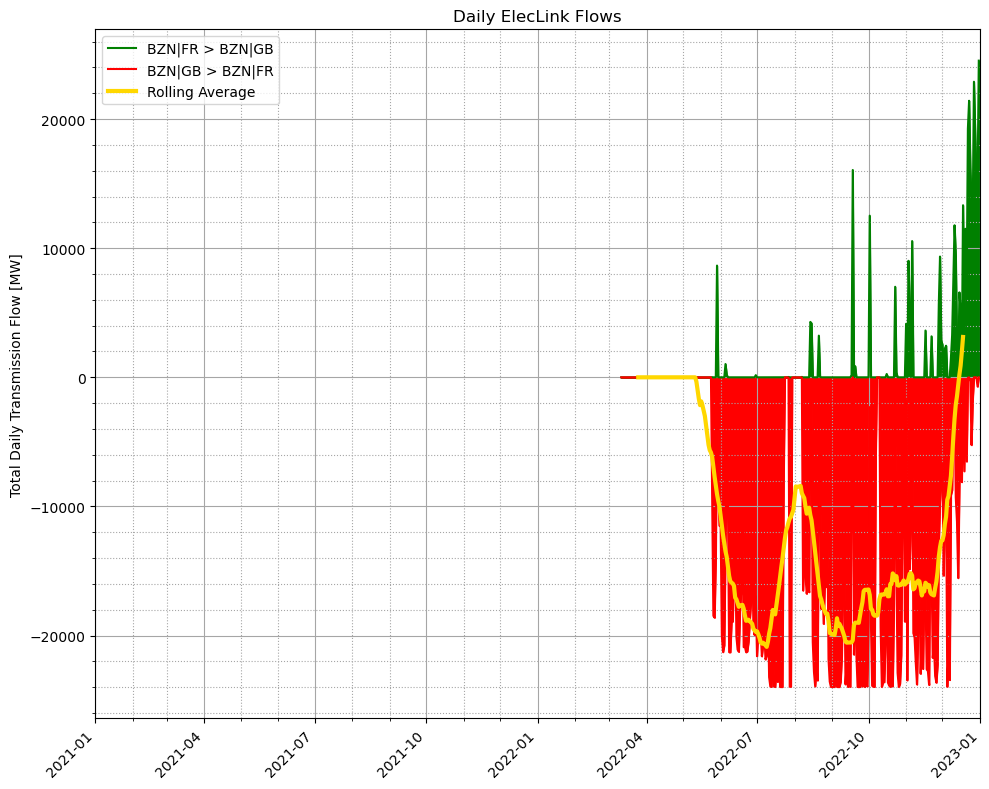

In [10]:
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

plt.title('Daily ElecLink Flows')
plt.ylabel('Total Daily Transmission Flow [MW]')

Mean = (ELCFlows["BZN|FR > BZN|GB [MW]"] - ELCFlows["BZN|GB > BZN|FR [MW]"])/2
Sum = ELCFlows["BZN|FR > BZN|GB [MW]"] - ELCFlows["BZN|GB > BZN|FR [MW]"]

ax.plot(ELCFlows["Date"], ELCFlows["BZN|FR > BZN|GB [MW]"], color="green", label="BZN|FR > BZN|GB")
ax.plot(ELCFlows["Date"], -ELCFlows["BZN|GB > BZN|FR [MW]"], color="red", label="BZN|GB > BZN|FR")
ax.plot(ELCFlows["Date"], Sum.rolling(28,  center=True).mean(), linewidth = 3, color = "gold", label="Rolling Average")


plt.legend()
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

fig.autofmt_xdate()

print(ax.get_xlim())

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlim(18628, 19358)
plt.tight_layout()

plt.fill_between(ELCFlows["Date"], ELCFlows["BZN|FR > BZN|GB [MW]"], color="green")
plt.fill_between(ELCFlows["Date"], -ELCFlows["BZN|GB > BZN|FR [MW]"], color="red")

ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter(""))

plt.show()

In [11]:
%store ELCFlows
del ELCFlows

Stored 'ELCFlows' (DataFrame)
